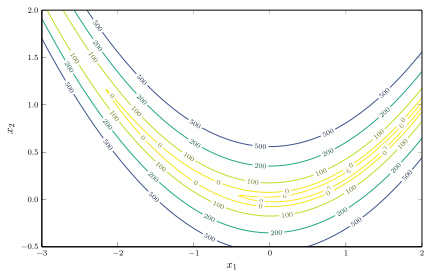

In [14]:
###################################################################################
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 100*(4x2 - x1^2)^2

x1 = -3:0.01:2
x2 = -0.5:0.01:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels=[2,10,50,200,500], 
    c = cgrad(:viridis, [0.01, 0.02, 0.03], rev = true), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-3,2),
    ylims = (-0.5,2),
    legend = false,
    grid = false,
    contour_labels = true,
    bins = 150,
    label = false)

In [15]:
mutable struct HyperGradientDescent
    α0 # initial learning rate
    μ # learning rate of the learning rate
    α # current learning rate
    g_prev # previous gradient
end

function init!(M::HyperGradientDescent, f, ∇f, x)
    M.α = M.α0
    M.g_prev = zeros(length(x))
    return M
end

function step!(M::HyperGradientDescent, f, ∇f, x)
    α, μ, g, g_prev = M.α, M.μ, ∇f(x), M.g_prev
    α = α + μ*(g⋅g_prev)
    M.g_prev, M.α = g, α
    return x - α*g
end

step! (generic function with 2 methods)

In [16]:
# Mathematical expression
f = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

# Initial point
x0 = [-2,1.5]

2-element Array{Float64,1}:
 -2.0
  1.5

In [17]:
M = HyperGradientDescent(0.0004, 8e-13, NaN, zeros(2))

HyperGradientDescent(0.0004, 8.0e-13, NaN, [0.0, 0.0])

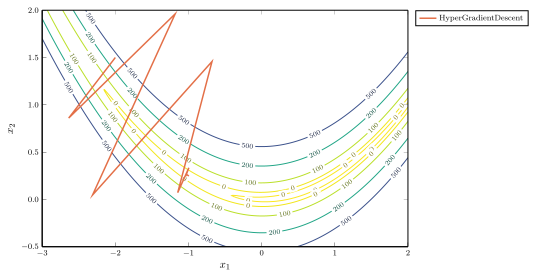

In [18]:
points = []
push!(points, (x0))
N = 40
init!(M, f, ∇f, x0)

for i=1:N
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "HyperGradientDescent", legend = true, lw = 1.5)

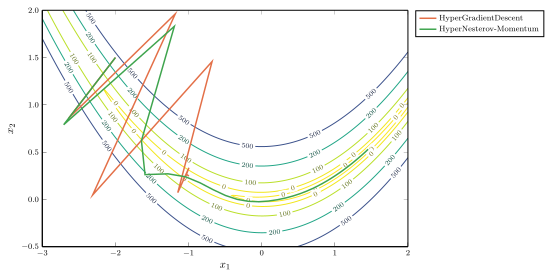

In [19]:
mutable struct HyperNesterovMomentum
    α0 # initial learning rate
    μ # learning rate of the learning rate
    β # momentum decay
    v # momentum
    α # current learning rate
    g_prev # previous gradient
end

function init!(M::HyperNesterovMomentum, f, ∇f, x)
    M.α = M.α0
    M.v = zeros(length(x))
    M.g_prev = zeros(length(x))
    return M
end

function step!(M::HyperNesterovMomentum, f, ∇f, x)
    α, β, μ = M.α, M.β, M.μ
    v, g, g_prev = M.v, ∇f(x), M.g_prev
    α = α - μ*(g⋅(-g_prev - β*v))
    v[:] = β*v + g
    M.g_prev, M.α = g, α
    return x - α*(g + β*v)
end

M = HyperNesterovMomentum(0.00023, 1e-12, 0.93, zeros(2), NaN, zeros(2))

# Initial point
x0 = [-2,1.5]

points = []
push!(points, (x0))
N = 40
init!(M, f, ∇f, x0)

for i=1:N
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "HyperNesterov-Momentum", legend = true, lw = 1.5)